Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import os


Dataset Loading

In [2]:
import numpy as np
import os
actions = ['Fighting', 'Yoga', 'Walking']
# Specify the folder where the datasets are saved
save_folder = "data_splits"

# Load datasets from the specified folder
X_train = np.load(os.path.join(save_folder, "X_train.npy"))
X_val = np.load(os.path.join(save_folder, "X_val.npy"))
X_test = np.load(os.path.join(save_folder, "X_test.npy"))
y_train = np.load(os.path.join(save_folder, "y_train.npy"))
y_val = np.load(os.path.join(save_folder, "y_val.npy"))
y_test = np.load(os.path.join(save_folder, "y_test.npy"))

print("Datasets loaded successfully!")


print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")



Datasets loaded successfully!
Training set: (31, 30, 255), Validation set: (7, 30, 255), Test set: (7, 30, 255)


# Model Construction

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),  # Regularization
    LSTM(128, return_sequences=False, activation="relu"),
    Dropout(0.2),  # Regularization
    Dense(64, activation="relu"),
    Dense(y_train.shape[1], activation="softmax")  # Output layer (multi-class classification)
])




c:\Users\Tanzid\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model Compiling 

In [4]:
from tensorflow.keras.optimizers import Adam

# Set a smaller learning rate
optimizer = Adam(learning_rate=0.00001)  # Reduced from default 0.001
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])


Summary

In [5]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        81,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 189,187 (739.01 KB)

 Trainable params: 189,187 (739.01 KB)

 Non-trainable params: 0 (0.00 B)

None


Callbacks

In [6]:
# Define callbacks
checkpoint = ModelCheckpoint("lstm_action_recognition_model.keras", monitor="val_accuracy", save_best_only=True, mode="max", verbose=1)
early_stopping = EarlyStopping(monitor="val_accuracy", patience=20, mode="max", verbose=1)

Model Training

In [7]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=5, verbose=1, min_lr=1e-6)

# Train the model with the callback
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=2000,
    batch_size=32,
    callbacks=[reduce_lr]
)


Epoch 1/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3226 - loss: 1.1063 - val_accuracy: 0.2857 - val_loss: 1.1032 - learning_rate: 1.0000e-05
Epoch 2/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.3871 - loss: 1.1033 - val_accuracy: 0.2857 - val_loss: 1.1027 - learning_rate: 1.0000e-05
Epoch 3/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.2903 - loss: 1.1009 - val_accuracy: 0.2857 - val_loss: 1.1023 - learning_rate: 1.0000e-05
Epoch 4/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3548 - loss: 1.0932 - val_accuracy: 0.2857 - val_loss: 1.1018 - learning_rate: 1.0000e-05
Epoch 5/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.3548 - loss: 1.0963 - val_accuracy: 0.2857 - val_loss: 1.1014 - learning_rate: 1.0000e-05
Epoch 6/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2903 - loss: 1.1105 - val_accuracy: 0.2857 - val_loss: 1.1009 - learning_rate: 1.0000e-05
Epoch 7/2000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.3548 - 

Model Saving

In [8]:
# Save the trained model
model.save("lstm_action_recognition_model.keras")
print("Model saved successfully!")


Model saved successfully!


# Evaluation

Metrices

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0787
Test Accuracy: 100.00%


Classification Report

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict class probabilities on the test set
y_pred_probs = model.predict(X_test)

# Convert probabilities to class predictions
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true, y_pred))

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3

    accuracy                           1.00         7
   macro avg       1.00      1.00      1.00         7
weighted avg       1.00      1.00      1.00         7

Confusion Matrix:
[[2 0 0]
 [0 2 0]
 [0 0 3]]
Test Loss: 0.0787
Test Accuracy: 100.00%


Confusion Matrix

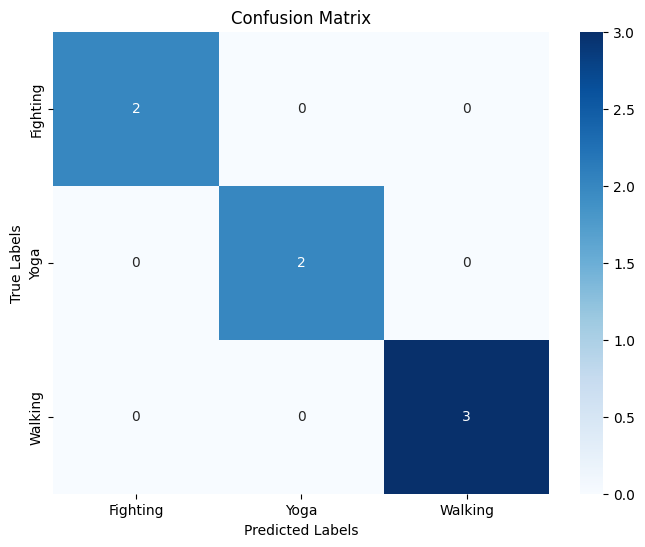

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actions, yticklabels=actions)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


Model Accuracy

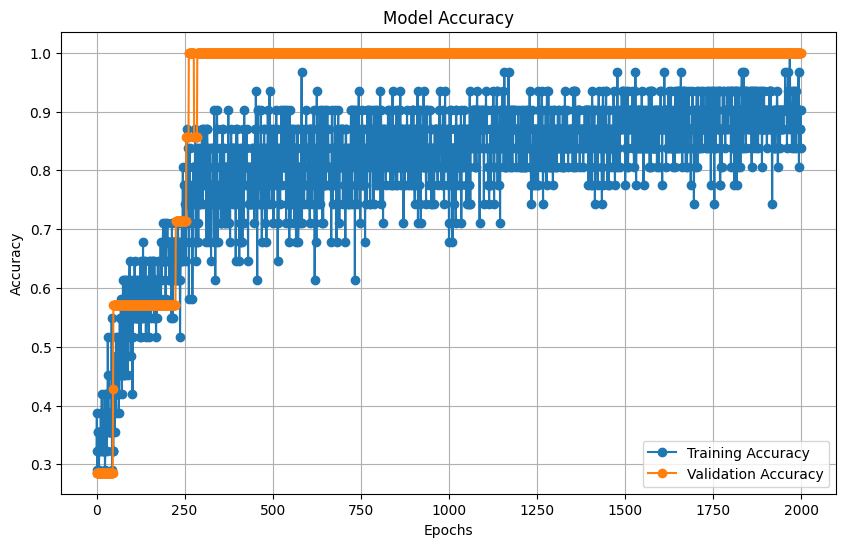

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()



Model Loss

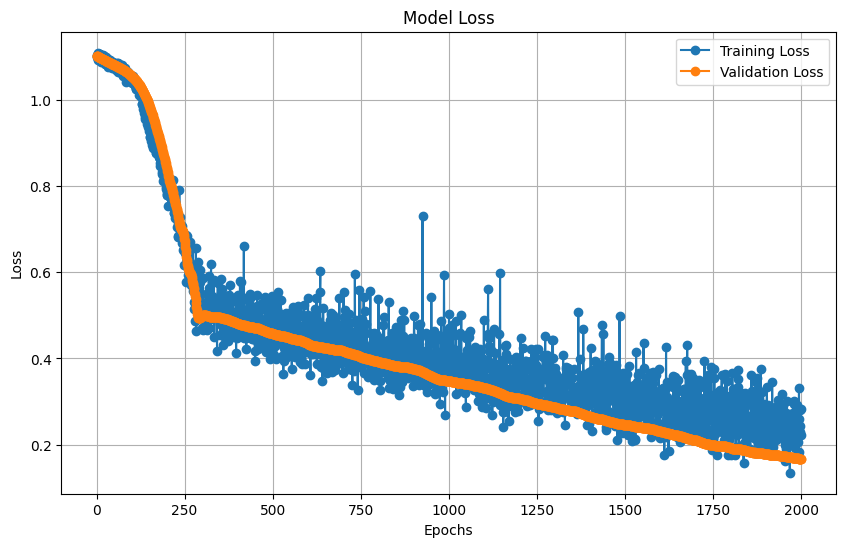

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


ROC Curve

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


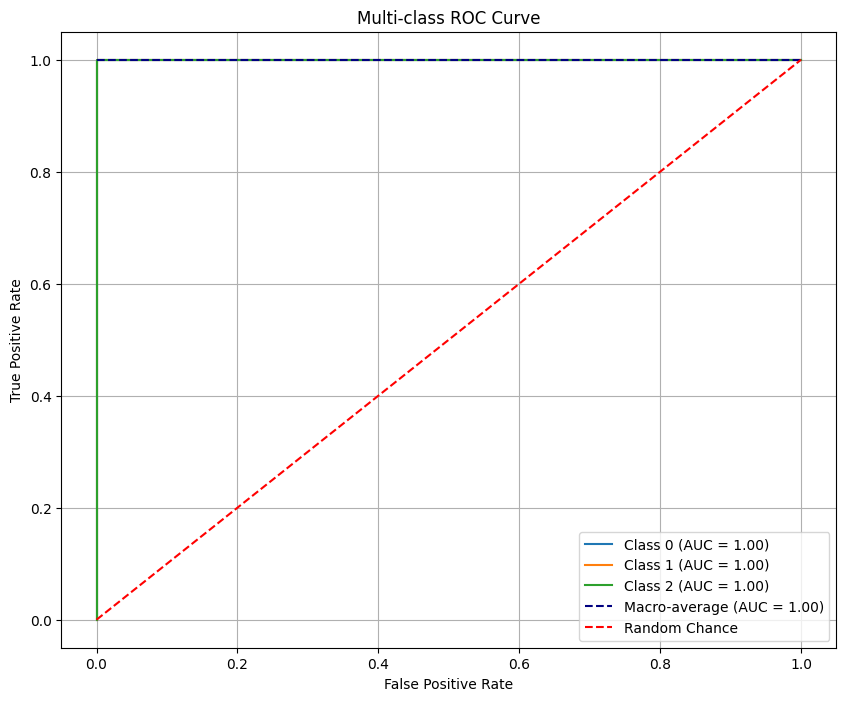

In [16]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the true labels (one-hot encoding)
n_classes = y_test.shape[1]
y_test_binarized = y_test  # Assuming `y_test` is already one-hot encoded

# Predict probabilities for the test set
y_pred_probs = model.predict(X_test)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
mean_tpr = np.zeros_like(all_fpr)

for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot the ROC curves
plt.figure(figsize=(10, 8))

# Plot ROC curve for each class
for i in range(n_classes):
    plt.plot(
        fpr[i], tpr[i],
        label=f"Class {i} (AUC = {roc_auc[i]:.2f})"
    )

# Plot macro-average ROC curve
plt.plot(
    fpr["macro"], tpr["macro"],
    label=f"Macro-average (AUC = {roc_auc['macro']:.2f})",
    color="navy", linestyle="--"
)

# Plot the random chance line
plt.plot([0, 1], [0, 1], "r--", label="Random Chance")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-class ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
